## GEOG5995M Portfolio assignment - RESIT

Student ID number: <font color = red>[201799057]</font>



Blocks 1 and 2 of the resit will use the Nepal dataset provided to you (nepal.shp). The Nepal data set contains development-related data for 75 districts in Nepal. Please look at the full list of variables and descriptions here: https://geodacenter.github.io/data-and-lab/nepal/. 

## Block One Submission
Using the Nepal dataset and the data exploration, cleaning and visualisaton skills introduced in the course, create a (non-spatial) visualisation showing the association between at least two variables in the Nepal dataset. 

- You should do so using skills developed in the practical exercises take any steps required to clean or pre-process the data. 
- It is expected that you will change the default appearance of the markers and include an appropriate title and axis labels. 
- Further marks will be awarded for appropriate use of colour pallets, inclusion of additional categorical variables in the visualisation and other steps taken to ensure effective data visualisation. 
- Ensure all the code has detailed comments.

**NOTE:** there are lots of variables to pick from, pick a few that you find interesting. You may want to create further derived variables. 

Write a brief paragraph in markdown (max. 300 words) detailing the visualisation choices made given the types of data you have chosen. 

In [1]:
# import required packages
import geopandas as gpd
import pandas as pd
import numpy as np
from numpy.random import seed
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
#Importing the neccessary regression packages
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot

In [2]:
# load the Nepal dataset
nepal = gpd.read_file('nepal.shp')

In [3]:
# Data-preprocessing

In [4]:
# Viewing the raw data to check the variables within it.
nepal.head()

,id,name_1,name_2,district,depecprov,povindex,pcinc,pcincppp,pcincmp,malkids,...,HEALTDAMT,HUMDAMT,INDDAMT,MULTDAMT,SOCDAMT,TOURDAMT,TRANDAMT,WATDAMT,TOTDAMT,geometry
0,1,None,Dhaualagiri,Baglung,27.01,27.33,354,573,25613,42.9,...,3584409,172736,369324,8050858,1308661,0,15421,1996315,32542286,"POLYGON ((83.10834 28.62020, 83.10560 28.60976..."
1,2,None,Dhaualagiri,Mustang,31.51,31.16,1189,1922,85957,54.7,...,2253911,172736,0,3712798,633763,0,15421,0,14427364,"POLYGON ((83.99726 29.31675, 84.00000 29.31576..."
2,3,None,Dhaualagiri,Myagdi,30.03,28.54,636,1028,45986,47.5,...,2279653,172736,369324,11784759,964089,0,2688597,854545,31437665,"POLYGON ((83.50688 28.79306, 83.51024 28.78809..."
3,4,None,Dhaualagiri,Parbat,21.84,24.62,627,1013,45289,26.2,...,26574,0,369324,4741985,0,0,0,667767,10439874,"POLYGON ((83.70261 28.39837, 83.70435 28.39452..."
4,5,Central,Bagmati,Bhaktapur,22.58,19.43,854,1379,61686,26.9,...,1338957,172736,0,2421424,1652237,0,16431544,23818495,49073311,"POLYGON ((85.52173 27.71822, 85.52359 27.71375..."


In [5]:
#Viewing the data types for each variable for analytical purposes.
nepal.dtypes

id              int64
name_1         object
name_2         object
district       object
depecprov     float64
               ...   
TOURDAMT        int64
TRANDAMT        int64
WATDAMT         int64
TOTDAMT         int64
geometry     geometry
Length: 62, dtype: object

In [6]:
# Creating a new dataframe by dropping variables that will not be used within this analysis.
nepal_df = nepal.drop(columns=['name_2', 'district', 'pcincppp', 'pcincmp', 'malkids', 'nosafh20', 'boyg1_5',
                              'girlg1_5', 'kids1_5', 'schoolcnt', 'schlppop', 'ad_illit', 'HEALTDAMT',
                              'HUMDAMT', 'INDDAMT', 'MULTDAMT', 'SOCDAMT', 'TOURDAMT', 'WATDAMT', 'TOTDAMT',
                              'BUDGDAMT', 'COMMDAMT', 'EDUDAMT', 'ENGYDAMT', 'ENVDAMT', 'FORDAMT', 'GOVDAMT',
                              'TRANDAMT', 'MULTCAMT', 'SOCCAMT', 'TOURCAMT', 'TRANCAMT', 'WATCAMT', 'TOTCAMT',
                              'AGDAMT', 'BANKDAMT', 'CONDAMT', 'CONCAMT', 'EDUCAMT', 'ENVCAMT', 'ENGYCAMT', 'FORCAMT',
                              'GOVCAMT', 'HEALTCAMT', 'HUMCAMT', 'INDCAMT', 'AGCAMT', 'BANKCAMT', 'BUDGCAMT', 'COMMCAMT',
                              'schlpkid'])
nepal_df

,id,name_1,depecprov,povindex,pcinc,lif40,population,ad_ilgt50,lon,lat,geometry
0,1,None,27.01,27.33,354,8.52,250065,0,83.252444,28.347313,"POLYGON ((83.10834 28.62020, 83.10560 28.60976..."
1,2,None,31.51,31.16,1189,12.02,11585,0,83.859902,28.981165,"POLYGON ((83.99726 29.31675, 84.00000 29.31576..."
2,3,None,30.03,28.54,636,7.27,109598,0,83.461955,28.552960,"POLYGON ((83.50688 28.79306, 83.51024 28.78809..."
3,4,None,21.84,24.62,627,6.11,145657,0,83.680893,28.211019,"POLYGON ((83.70261 28.39837, 83.70435 28.39452..."
4,5,Central,22.58,19.43,854,3.31,296705,0,85.442906,27.677353,"POLYGON ((85.52173 27.71822, 85.52359 27.71375..."
...,...,...,...,...,...,...,...,...,...,...,...
70,71,West,27.24,27.37,562,7.71,196873,0,83.081325,27.908351,"POLYGON ((83.02333 28.10508, 83.02967 28.09924..."
71,72,West,27.36,27.42,465,8.26,279005,0,83.309026,28.093708,"POLYGON ((83.19185 28.26453, 83.20638 28.25558..."
72,73,West,26.01,27.99,716,8.09,638836,0,83.955312,27.633575,"POLYGON ((84.10302 27.86387, 84.09755 27.85927..."
73,74,West,28.42,25.23,609,7.25,258842,0,83.625682,27.817122,"POLYGON ((83.37988 27.95869, 83.37875 27.95583..."


In [7]:
# Renaming columns using the meta-data for the purpose of labeling the axis of the visualisation
nepal_df = nepal_df.rename(columns={'name_1':'Nepalese region',
                                        'depecprov':'Deprivation',
                                        'povindex':'Poverty Index.',
                                        'pcinc':'Income PC',
                                        'lif40':'Mortality % < 40',
                                        'population':'Population',
                                        'ad_ilgt50':'Eduction Indicator',
                                        'lon':'Longtitude',
                                        'lat':'Latitude'})
nepal_df

,id,Nepalese region,Deprivation,Poverty Index.,Income PC,Mortality % < 40,Population,Eduction Indicator,Longtitude,Latitude,geometry
0,1,None,27.01,27.33,354,8.52,250065,0,83.252444,28.347313,"POLYGON ((83.10834 28.62020, 83.10560 28.60976..."
1,2,None,31.51,31.16,1189,12.02,11585,0,83.859902,28.981165,"POLYGON ((83.99726 29.31675, 84.00000 29.31576..."
2,3,None,30.03,28.54,636,7.27,109598,0,83.461955,28.552960,"POLYGON ((83.50688 28.79306, 83.51024 28.78809..."
3,4,None,21.84,24.62,627,6.11,145657,0,83.680893,28.211019,"POLYGON ((83.70261 28.39837, 83.70435 28.39452..."
4,5,Central,22.58,19.43,854,3.31,296705,0,85.442906,27.677353,"POLYGON ((85.52173 27.71822, 85.52359 27.71375..."
...,...,...,...,...,...,...,...,...,...,...,...
70,71,West,27.24,27.37,562,7.71,196873,0,83.081325,27.908351,"POLYGON ((83.02333 28.10508, 83.02967 28.09924..."
71,72,West,27.36,27.42,465,8.26,279005,0,83.309026,28.093708,"POLYGON ((83.19185 28.26453, 83.20638 28.25558..."
72,73,West,26.01,27.99,716,8.09,638836,0,83.955312,27.633575,"POLYGON ((84.10302 27.86387, 84.09755 27.85927..."
73,74,West,28.42,25.23,609,7.25,258842,0,83.625682,27.817122,"POLYGON ((83.37988 27.95869, 83.37875 27.95583..."


In [8]:
#dropping missing data. Only 4 rows were dropped due to missing data.
nepal_df_1 = nepal_df.dropna()
nepal_df_1

,id,Nepalese region,Deprivation,Poverty Index.,Income PC,Mortality % < 40,Population,Eduction Indicator,Longtitude,Latitude,geometry
4,5,Central,22.58,19.43,854,3.31,296705,0,85.442906,27.677353,"POLYGON ((85.52173 27.71822, 85.52359 27.71375..."
5,6,Central,20.85,33.38,607,7.68,333978,0,84.960120,27.950420,"POLYGON ((85.11038 28.34680, 85.11222 28.34392..."
6,7,Central,31.00,22.45,1710,4.39,1688131,0,85.349621,27.727936,"POLYGON ((85.45375 27.81118, 85.45537 27.80906..."
7,8,Central,21.14,27.34,866,6.23,375040,0,85.621937,27.535817,"POLYGON ((85.55230 27.75662, 85.55180 27.75426..."
8,9,Central,23.34,19.18,1172,4.03,453466,0,85.344826,27.538152,"POLYGON ((85.34588 27.67149, 85.35433 27.66776..."
...,...,...,...,...,...,...,...,...,...,...,...
70,71,West,27.24,27.37,562,7.71,196873,0,83.081325,27.908351,"POLYGON ((83.02333 28.10508, 83.02967 28.09924..."
71,72,West,27.36,27.42,465,8.26,279005,0,83.309026,28.093708,"POLYGON ((83.19185 28.26453, 83.20638 28.25558..."
72,73,West,26.01,27.99,716,8.09,638836,0,83.955312,27.633575,"POLYGON ((84.10302 27.86387, 84.09755 27.85927..."
73,74,West,28.42,25.23,609,7.25,258842,0,83.625682,27.817122,"POLYGON ((83.37988 27.95869, 83.37875 27.95583..."


In [9]:
# Data visualisation 

In [10]:
#Observing the mean of each varibale by region of Nepal
nepal_df_1.groupby('Nepalese region')[['Deprivation','Poverty Index.','Income PC',
                                       'Mortality % < 40', 'Population', 'Eduction Indicator']].mean().head()

,Deprivation,Poverty Index.,Income PC,Mortality % < 40,Population,Eduction Indicator
Nepalese region,,,,,,
Central,26.440526,34.430000,770.736842,6.668947,500217.157895,0.421053
East,29.118750,31.012500,713.437500,8.023125,360398.562500,0.125000
Far-Western,37.905556,38.153333,462.333333,9.898889,306881.555556,0.444444
Mid-Western,40.604000,39.976667,514.133333,10.124000,219456.333333,0.400000
West,26.668333,27.505000,781.416667,7.570833,362156.000000,0.083333


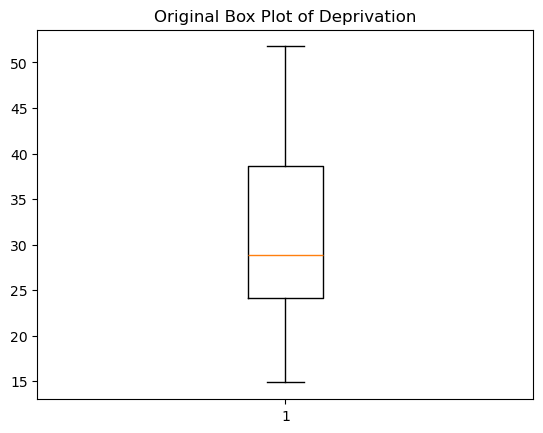

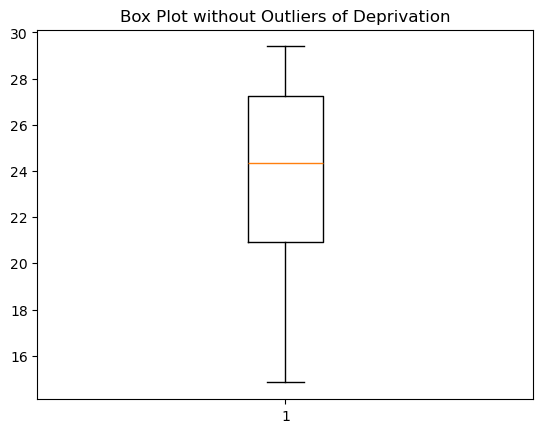

In [11]:
# Defining a box-plot visualisation to identify outliers within the dataframe and adding a threshold
#Adding code for a box-plot visualisation that does not consider outliers
def removal_box_plot(df, column, threshold):
    plt.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
#Adding code to remove outliers
    removed_outliers = df[df[column] <= threshold]
#Adding the code to plot the box-plot considering the outlier removal code
    plt.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
#Performing the analysis of the deprivation variable using the new function defined above   
threshold_value = 30
no_outliers_Dep = removal_box_plot(nepal_df_1, 'Deprivation', threshold_value)

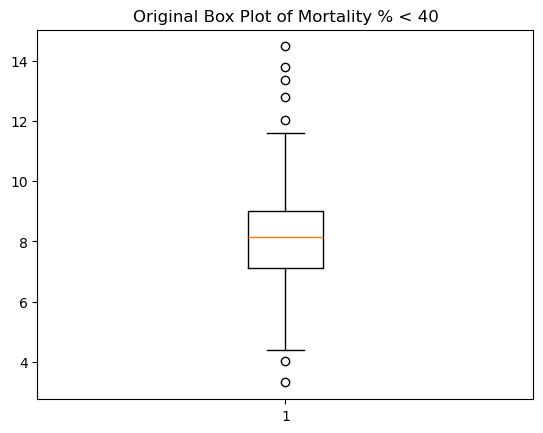

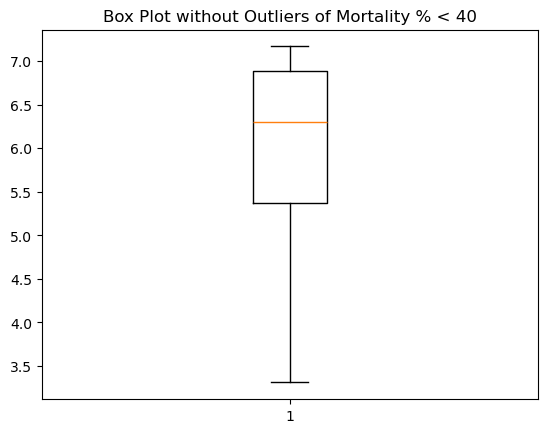

In [12]:
#Performing the analysis on the mortality rate variable using the function defined above
threshold_value = 7.2
no_outliers_Mort = removal_box_plot(nepal_df_1, 'Mortality % < 40', threshold_value)

In [13]:
#Observing the dataframe to remind ourselves of the variables
nepal_df_1.head()

,id,Nepalese region,Deprivation,Poverty Index.,Income PC,Mortality % < 40,Population,Eduction Indicator,Longtitude,Latitude,geometry
4,5,Central,22.58,19.43,854,3.31,296705,0,85.442906,27.677353,"POLYGON ((85.52173 27.71822, 85.52359 27.71375..."
5,6,Central,20.85,33.38,607,7.68,333978,0,84.960120,27.950420,"POLYGON ((85.11038 28.34680, 85.11222 28.34392..."
6,7,Central,31.00,22.45,1710,4.39,1688131,0,85.349621,27.727936,"POLYGON ((85.45375 27.81118, 85.45537 27.80906..."
7,8,Central,21.14,27.34,866,6.23,375040,0,85.621937,27.535817,"POLYGON ((85.55230 27.75662, 85.55180 27.75426..."
8,9,Central,23.34,19.18,1172,4.03,453466,0,85.344826,27.538152,"POLYGON ((85.34588 27.67149, 85.35433 27.66776..."


In [14]:
#Setting a multi-index with both the unique id variable for each observation and the region of Nepal
nepal_df_2 = nepal_df_1.set_index(['id', 'Nepalese region'])
#Viewing the newly created dataframe with the multi-index
nepal_df_2

,,Deprivation,Poverty Index.,Income PC,Mortality % < 40,Population,Eduction Indicator,Longtitude,Latitude,geometry
id,Nepalese region,,,,,,,,,
5,Central,22.58,19.43,854,3.31,296705,0,85.442906,27.677353,"POLYGON ((85.52173 27.71822, 85.52359 27.71375..."
6,Central,20.85,33.38,607,7.68,333978,0,84.960120,27.950420,"POLYGON ((85.11038 28.34680, 85.11222 28.34392..."
7,Central,31.00,22.45,1710,4.39,1688131,0,85.349621,27.727936,"POLYGON ((85.45375 27.81118, 85.45537 27.80906..."
8,Central,21.14,27.34,866,6.23,375040,0,85.621937,27.535817,"POLYGON ((85.55230 27.75662, 85.55180 27.75426..."
9,Central,23.34,19.18,1172,4.03,453466,0,85.344826,27.538152,"POLYGON ((85.34588 27.67149, 85.35433 27.66776..."
...,...,...,...,...,...,...,...,...,...,...
71,West,27.24,27.37,562,7.71,196873,0,83.081325,27.908351,"POLYGON ((83.02333 28.10508, 83.02967 28.09924..."
72,West,27.36,27.42,465,8.26,279005,0,83.309026,28.093708,"POLYGON ((83.19185 28.26453, 83.20638 28.25558..."
73,West,26.01,27.99,716,8.09,638836,0,83.955312,27.633575,"POLYGON ((84.10302 27.86387, 84.09755 27.85927..."


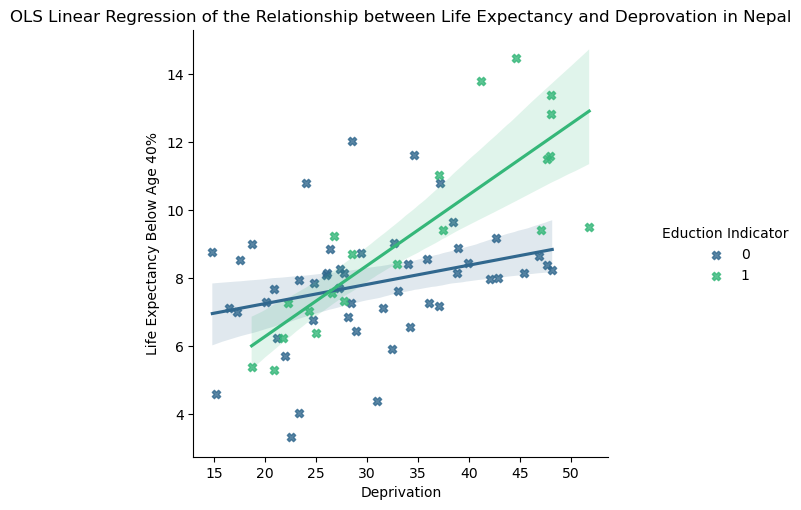

In [32]:
#Creating the visualisation for the linear regression analysis
#using the education dummy variable as the hue to view the effects of the linear regression...
#...based on the level of adult literacy in each region of Nepal.
#The independent variable is the mortality rate while deprivation represents the dependent variable
nepal_df_3 = sns.lmplot(y="Mortality % < 40", 
                        x="Deprivation",
                        hue ="Eduction Indicator",
                        palette = "viridis",
                        legend = True,
                        data=nepal_df_2,
                        markers='X')
#Adding a title and providing the x and y axis with the relevant labels.
nepal_df_3.set(xlabel ="Deprivation",
               ylabel = "Life Expectancy Below Age 40%",
               title ="OLS Linear Regression of the Relationship between Life Expectancy and Deprovation in Nepal")

In [16]:
#Performing the OLS regression analysis using the same dependent and independent variables...
#...as the visulaisation presented above.
x = nepal_df_2["Deprivation"]
y = nepal_df_2["Mortality % < 40"]
Dep_Mort_model = sm.OLS(y, x).fit()
predictions = Dep_Mort_model.predict(x)
Dep_Mort_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Mortality % < 40   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              996.3
Date:                Tue, 17 Sep 2024   Prob (F-statistic):                    3.93e-43
Time:                        12:47:32   Log-Likelihood:                         -156.36
No. Observations:                  71   AIC:                                      314.7
Df Residuals:                      70   BIC:                                      317.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Deprivation     0.2503      0.008     31.565      0.000       0.235       0.266
==============================================================================
Omnibus:                        0.751   Durbin-Watson:                   2.450
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.787
Skew:                           0.043   Prob(JB):                        0.675
Kurtosis:                       2.492   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Block One Submission

The objective of this linear regression analysis is to identify the relationship between the deprivation of a region of Nepal and the percentage of people not expected to survive past the age of 40. I first provide a visualisation identifying the outliers in both variables using a boxplot. After adding a threshold, we can identify the median of both variables. The analysis of the mean of the data is provided prior to this step. After analysing whether the data includes any outliers, we can perform the linear regression using the dummy variable of adult literacy rate being above 50% within a region. Alongside the linear regression analysis performed afterwards, this identifies a positive relationship where the number of individuals not expected to survive past the age of 40 in Nepal increases by 25% when deprivation increases by 1 unit. The Durbin-Watson test equals 2 indicating there is no autocorrelation in the results. The p-value is below 0.05 indicating that the results are significant. The visualisations used here have provided me with a unique way to interpret how mortality is impacted by deprivation within a country by showing the linear relationship and how this relationship changes when we add the adult literacy dummy variable. A nominal colour scheme was used since the visualisation is distinguishing between only two variables that are not continuous but binary. A viridis palette is used to ensure the accessibility of our visualisation for those with colour blindness. "X" markers were adopted to better highlight the residuals within the visualisation and make them stand out to the reader. An alpha is not used to adjust the opaqueness of residuals in this visualisation design as there are not many overlapping data points.
    

## Block Two Submission: 
 
- Using the course notebooks and lectures as a guide create a static visualisation showing the spatial distribution of variable(s) of your choice in the Nepal dataset. 
- The type of spatial visualisation chosen should be suitable for the data chosen and appropriate data cleaning and pre-processing steps undertaken. 
- Using skills developed in the module you should change the default appearance of your chosen visualisation. 
- Include an appropriate title and legend labels. 
- Further marks will be awarded for appropriate use of colour pallets and other customisations to aid interpretation and improve accessibility. 
- Write a brief paragraph in markdown (max 300 words) detailing the visual design choices made. 

In [17]:
# import any further required packages
import geopandas as gpd
import pandas as pd
import numpy as np
from numpy.random import seed
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
import plotly.express as px

In [18]:
# Data-preprocessing

In [19]:
# Removing variables that do not include geographic data or neccessary data to the analysis
nepal_geo_df = nepal.drop(columns=['pcincppp', 'pcincmp', 'malkids', 'nosafh20', 'boyg1_5',
                              'girlg1_5', 'kids1_5', 'schoolcnt', 'schlppop', 'ad_illit', 'HEALTDAMT',
                              'HUMDAMT', 'INDDAMT', 'MULTDAMT', 'SOCDAMT', 'TOURDAMT', 'WATDAMT', 'TOTDAMT',
                              'BUDGDAMT', 'COMMDAMT', 'EDUDAMT', 'ENGYDAMT', 'ENVDAMT', 'FORDAMT', 'GOVDAMT',
                              'TRANDAMT', 'MULTCAMT', 'SOCCAMT', 'TOURCAMT', 'TRANCAMT', 'WATCAMT', 'TOTCAMT',
                              'AGDAMT', 'BANKDAMT', 'CONDAMT', 'CONCAMT', 'EDUCAMT', 'ENVCAMT', 'ENGYCAMT', 'FORCAMT',
                              'GOVCAMT', 'HEALTCAMT', 'HUMCAMT', 'INDCAMT', 'AGCAMT', 'BANKCAMT', 'BUDGCAMT', 'COMMCAMT',
                              'schlpkid'])
#Viewing the newly created dataset
nepal_geo_df

,id,name_1,name_2,district,depecprov,povindex,pcinc,lif40,population,ad_ilgt50,lon,lat,geometry
0,1,None,Dhaualagiri,Baglung,27.01,27.33,354,8.52,250065,0,83.252444,28.347313,"POLYGON ((83.10834 28.62020, 83.10560 28.60976..."
1,2,None,Dhaualagiri,Mustang,31.51,31.16,1189,12.02,11585,0,83.859902,28.981165,"POLYGON ((83.99726 29.31675, 84.00000 29.31576..."
2,3,None,Dhaualagiri,Myagdi,30.03,28.54,636,7.27,109598,0,83.461955,28.552960,"POLYGON ((83.50688 28.79306, 83.51024 28.78809..."
3,4,None,Dhaualagiri,Parbat,21.84,24.62,627,6.11,145657,0,83.680893,28.211019,"POLYGON ((83.70261 28.39837, 83.70435 28.39452..."
4,5,Central,Bagmati,Bhaktapur,22.58,19.43,854,3.31,296705,0,85.442906,27.677353,"POLYGON ((85.52173 27.71822, 85.52359 27.71375..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,West,Lumbini,Arghakhanchi,27.24,27.37,562,7.71,196873,0,83.081325,27.908351,"POLYGON ((83.02333 28.10508, 83.02967 28.09924..."
71,72,West,Lumbini,Gulmi,27.36,27.42,465,8.26,279005,0,83.309026,28.093708,"POLYGON ((83.19185 28.26453, 83.20638 28.25558..."
72,73,West,Lumbini,Nawalparasi,26.01,27.99,716,8.09,638836,0,83.955312,27.633575,"POLYGON ((84.10302 27.86387, 84.09755 27.85927..."
73,74,West,Lumbini,Palpa,28.42,25.23,609,7.25,258842,0,83.625682,27.817122,"POLYGON ((83.37988 27.95869, 83.37875 27.95583..."


In [20]:
#Renaming the variables using the meta-data
nepal_geo_df = nepal_geo_df.rename(columns={'name_1':'Nepalese region',
                                        'name_2':'Nepalese zone',
                                        'district':'Nepalese district',
                                        'depecprov':'Deprivation',
                                        'povindex':'Poverty Index.',
                                        'pcinc':'Income PC',
                                        'lif40':'Mortality % < 40',
                                        'population':'Population',
                                        'ad_ilgt50':'Eduction Indicator',
                                        'lon':'Longtitude',
                                        'lat':'Latitude'})
#Checking that the variables were renamed correctly
nepal_geo_df

,id,Nepalese region,Nepalese zone,Nepalese district,Deprivation,Poverty Index.,Income PC,Mortality % < 40,Population,Eduction Indicator,Longtitude,Latitude,geometry
0,1,None,Dhaualagiri,Baglung,27.01,27.33,354,8.52,250065,0,83.252444,28.347313,"POLYGON ((83.10834 28.62020, 83.10560 28.60976..."
1,2,None,Dhaualagiri,Mustang,31.51,31.16,1189,12.02,11585,0,83.859902,28.981165,"POLYGON ((83.99726 29.31675, 84.00000 29.31576..."
2,3,None,Dhaualagiri,Myagdi,30.03,28.54,636,7.27,109598,0,83.461955,28.552960,"POLYGON ((83.50688 28.79306, 83.51024 28.78809..."
3,4,None,Dhaualagiri,Parbat,21.84,24.62,627,6.11,145657,0,83.680893,28.211019,"POLYGON ((83.70261 28.39837, 83.70435 28.39452..."
4,5,Central,Bagmati,Bhaktapur,22.58,19.43,854,3.31,296705,0,85.442906,27.677353,"POLYGON ((85.52173 27.71822, 85.52359 27.71375..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,West,Lumbini,Arghakhanchi,27.24,27.37,562,7.71,196873,0,83.081325,27.908351,"POLYGON ((83.02333 28.10508, 83.02967 28.09924..."
71,72,West,Lumbini,Gulmi,27.36,27.42,465,8.26,279005,0,83.309026,28.093708,"POLYGON ((83.19185 28.26453, 83.20638 28.25558..."
72,73,West,Lumbini,Nawalparasi,26.01,27.99,716,8.09,638836,0,83.955312,27.633575,"POLYGON ((84.10302 27.86387, 84.09755 27.85927..."
73,74,West,Lumbini,Palpa,28.42,25.23,609,7.25,258842,0,83.625682,27.817122,"POLYGON ((83.37988 27.95869, 83.37875 27.95583..."


In [21]:
#dropping rows containing missing variables. Only 4 rows were deleted using this method
nepal_geo_df_1 = nepal_geo_df.dropna()
nepal_geo_df_1

,id,Nepalese region,Nepalese zone,Nepalese district,Deprivation,Poverty Index.,Income PC,Mortality % < 40,Population,Eduction Indicator,Longtitude,Latitude,geometry
4,5,Central,Bagmati,Bhaktapur,22.58,19.43,854,3.31,296705,0,85.442906,27.677353,"POLYGON ((85.52173 27.71822, 85.52359 27.71375..."
5,6,Central,Bagmati,Dhading,20.85,33.38,607,7.68,333978,0,84.960120,27.950420,"POLYGON ((85.11038 28.34680, 85.11222 28.34392..."
6,7,Central,Bagmati,Kathmandu,31.00,22.45,1710,4.39,1688131,0,85.349621,27.727936,"POLYGON ((85.45375 27.81118, 85.45537 27.80906..."
7,8,Central,Bagmati,Kavrepalanchok,21.14,27.34,866,6.23,375040,0,85.621937,27.535817,"POLYGON ((85.55230 27.75662, 85.55180 27.75426..."
8,9,Central,Bagmati,Lalitpur,23.34,19.18,1172,4.03,453466,0,85.344826,27.538152,"POLYGON ((85.34588 27.67149, 85.35433 27.66776..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,West,Lumbini,Arghakhanchi,27.24,27.37,562,7.71,196873,0,83.081325,27.908351,"POLYGON ((83.02333 28.10508, 83.02967 28.09924..."
71,72,West,Lumbini,Gulmi,27.36,27.42,465,8.26,279005,0,83.309026,28.093708,"POLYGON ((83.19185 28.26453, 83.20638 28.25558..."
72,73,West,Lumbini,Nawalparasi,26.01,27.99,716,8.09,638836,0,83.955312,27.633575,"POLYGON ((84.10302 27.86387, 84.09755 27.85927..."
73,74,West,Lumbini,Palpa,28.42,25.23,609,7.25,258842,0,83.625682,27.817122,"POLYGON ((83.37988 27.95869, 83.37875 27.95583..."


In [22]:
#Setting the multi-index using the unique id and the region of Nepal variables
nepal_geo_df_2 = nepal_geo_df_1.set_index(['id', 'Nepalese region'])
#Checking for any mistakes within the data caused by the cod
nepal_geo_df_2

,,Nepalese zone,Nepalese district,Deprivation,Poverty Index.,Income PC,Mortality % < 40,Population,Eduction Indicator,Longtitude,Latitude,geometry
id,Nepalese region,,,,,,,,,,,
5,Central,Bagmati,Bhaktapur,22.58,19.43,854,3.31,296705,0,85.442906,27.677353,"POLYGON ((85.52173 27.71822, 85.52359 27.71375..."
6,Central,Bagmati,Dhading,20.85,33.38,607,7.68,333978,0,84.960120,27.950420,"POLYGON ((85.11038 28.34680, 85.11222 28.34392..."
7,Central,Bagmati,Kathmandu,31.00,22.45,1710,4.39,1688131,0,85.349621,27.727936,"POLYGON ((85.45375 27.81118, 85.45537 27.80906..."
8,Central,Bagmati,Kavrepalanchok,21.14,27.34,866,6.23,375040,0,85.621937,27.535817,"POLYGON ((85.55230 27.75662, 85.55180 27.75426..."
9,Central,Bagmati,Lalitpur,23.34,19.18,1172,4.03,453466,0,85.344826,27.538152,"POLYGON ((85.34588 27.67149, 85.35433 27.66776..."
...,...,...,...,...,...,...,...,...,...,...,...,...
71,West,Lumbini,Arghakhanchi,27.24,27.37,562,7.71,196873,0,83.081325,27.908351,"POLYGON ((83.02333 28.10508, 83.02967 28.09924..."
72,West,Lumbini,Gulmi,27.36,27.42,465,8.26,279005,0,83.309026,28.093708,"POLYGON ((83.19185 28.26453, 83.20638 28.25558..."
73,West,Lumbini,Nawalparasi,26.01,27.99,716,8.09,638836,0,83.955312,27.633575,"POLYGON ((84.10302 27.86387, 84.09755 27.85927..."


In [23]:
nepal_geo_df_2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
# Data Visualisation

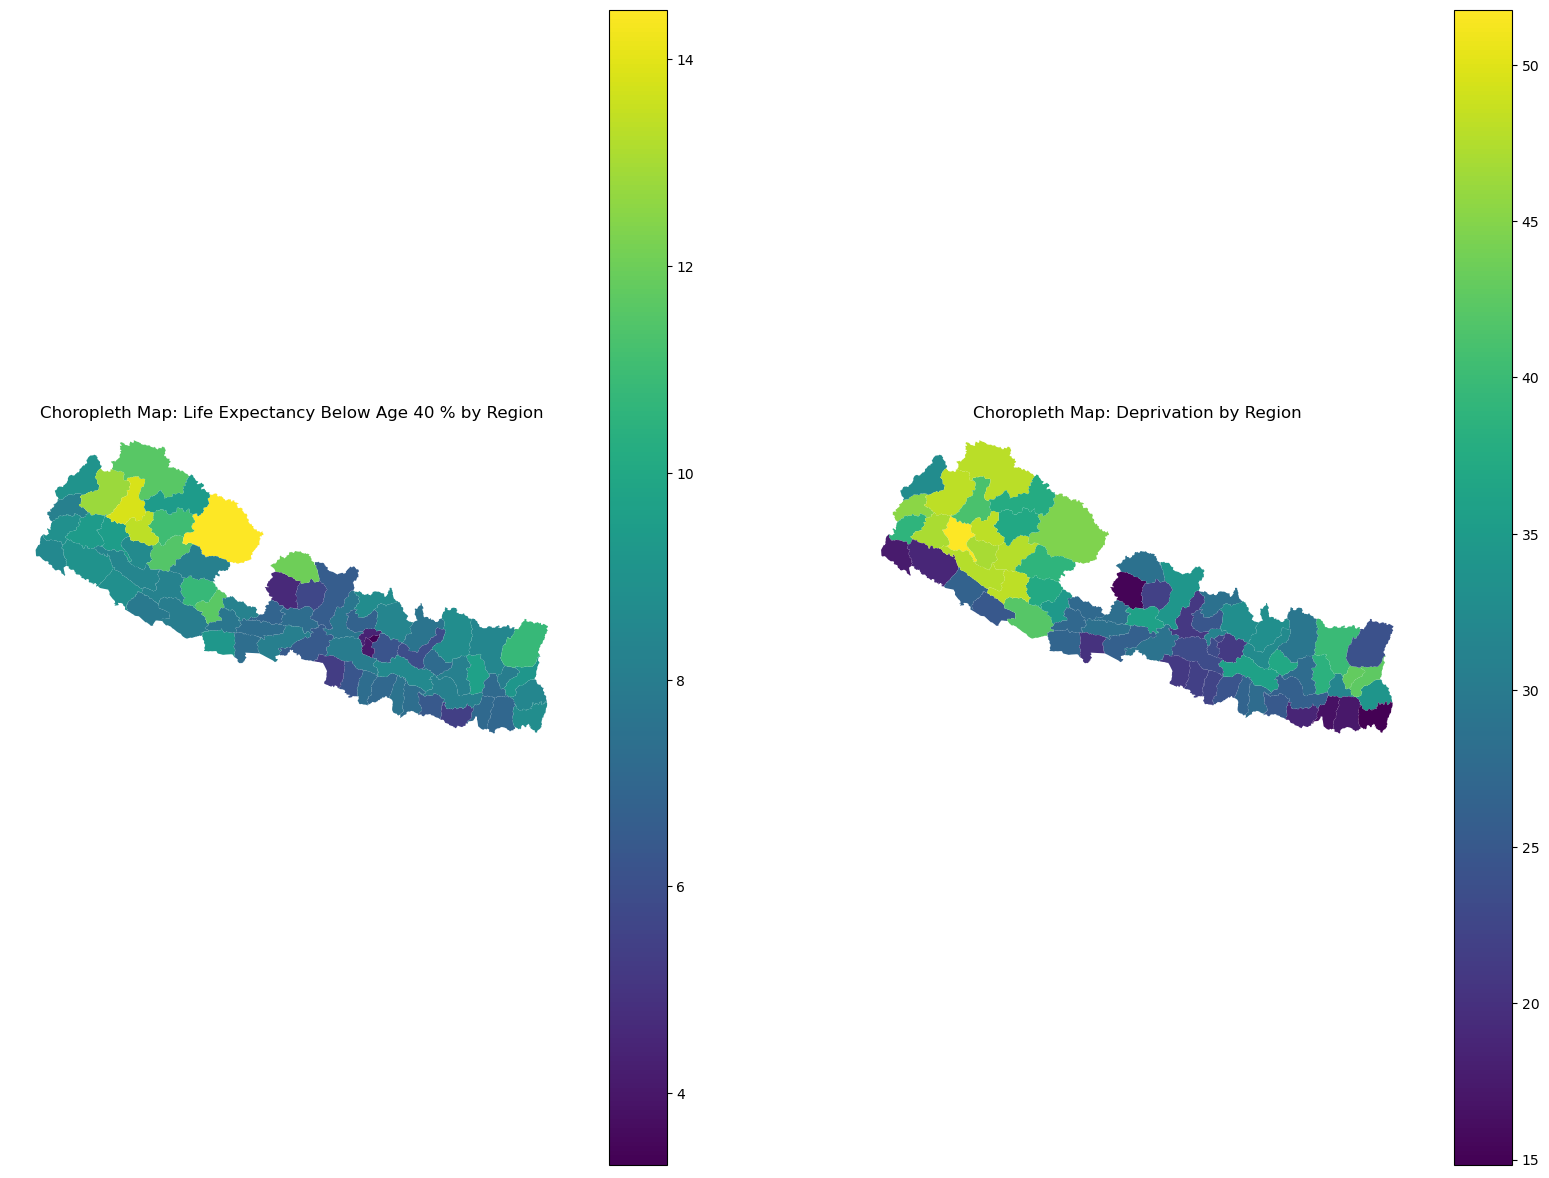

In [27]:
# Plotting a Choropleth map featuring two subplots.
f,ax = plt.subplots(1,2, figsize=(20,15))
# Map 1 identifies Mortality rate by region.
nepal_geo_df_2.plot(ax=ax[0], column ='Mortality % < 40', legend=True, cmap = 'viridis')
# Map 2 identifies deprivation by region.
nepal_geo_df_2.plot(ax=ax[1], column ='Deprivation', legend=True, cmap = 'viridis')
# Setting appropriate titles
ax[0].set_title('Choropleth Map: Life Expectancy Below Age 40 % by Region')
ax[1].set_title('Choropleth Map: Deprivation by Region')
# The Axis are not needed here.
ax[0].set_axis_off()
ax[1].set_axis_off()
# Creating the Plot based on the code provided above.
plt.show()

### Block Two Submission

The spatial visualisation explored in this analysis builds upon the analysis from block one by identifying the spatial variation of the mortality rate and deprivation between each region of Nepal. The data is cleaned to include all geographic variables such as coordinates, geometry, regions, districts, and zones of Nepal. Steps have been taken to check the coordinate reference system (CRS) of the created data frame. The choropleth map shown above identifies that the northern regions of Nepal show higher percentage of people not surviving past the age of 40. Similarly, northern regions of Nepal are shown to have higher rates of deprivation when compared to the southern regions of Nepal. This supports the linear regression featured in block one as it identifies a potential relationship between the variables. The choropleth map also provides a practical tool for policymakers to use since the visualisation identifies specific regions in which have higher deprivation and mortality rates. The viridis cmap is present within the spatial visualisation as it is most used for its accessibility for those with colour blindness. The maps are presented in one plot for the purpose of providing a comparison. The legends are not used within this visualisation design as it does not provide any useful information to the reader that is not present within the title. While this analysis shows the results at the country level, future visualisations could include results at the region and district level to obtain a more precise understanding as to the critical locations that require government intervention to lower deprivation and mortality rates.
